In [2]:
import pandas as pd
import os
from glob import glob

PATH = 'regression_results'
EXT = "marginal_effects_capitol_ord.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]

In [3]:
df_cat_list = []
for fn in all_csv_files:
    levels = fn.split("/")[1:-1]
    
    df = pd.read_csv(fn)
    
    cols = ['factor','AME', 'lower','upper']
    df1 = df[cols]
    df1['country'] = levels[0]
    df1['capitol'] = levels[1]
    df1['country_future'] = levels[2]
    df1['russian'] = levels[3]
    df1['digital'] = levels[3]
    df1['version'] = levels[4]

    df_cat_list.append(df1)

df_cat = pd.concat(df_cat_list)
df_cat.index = range(df_cat.shape[0])

/Users/damianruck/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/damianruck/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [4]:
df_cat['mark'] = df_cat['russian'].copy()
df_cat['mark'] = df_cat['mark'].replace( {'trust_russian': 'o', 'source_russian': 'o'} )
#df_cat['mark'] = df_cat['mark'].replace( {'trust_russian': 's', 'source_russian': '^'} )

df_cat['color'] = df_cat['country_future'].copy()
df_cat['color'] = df_cat['color'].replace( 
    {'country_future_ordinal': 'black','country_future_russia_eu': 'black', 'country_future_russia_dontknow': 'tomato', 
     'country_future_dontknow_eu': 'cornflowerblue'} )



clus = {
    'trust_digital':1,'source_digital':1, 'trust_russian':2, 'source_russian':2, 
      'country_future_ordinal':3, 'country_future_russia_dontknow':3,'country_future_dontknow_eu':3, 'country_future_russia_eu':3}

df_cat['x'] = df_cat['factor']
df_cat['x'] = df_cat['x'].replace(clus)

df_cat = df_cat[df_cat.x.isin([1,2,3])]

ii_future = (df_cat['country_future'] == 'country_future_ordinal')

df_cat = df_cat[ii_future]

In [5]:
capitol_ques = ['capitol_weak_strong', 'capitol_weak_noeffect', 'capitol_strong_noeffect']
capitol_ques = ['capitol_ordinal', 'capitol_effect_noeffect']

0
1
0
1
0
1


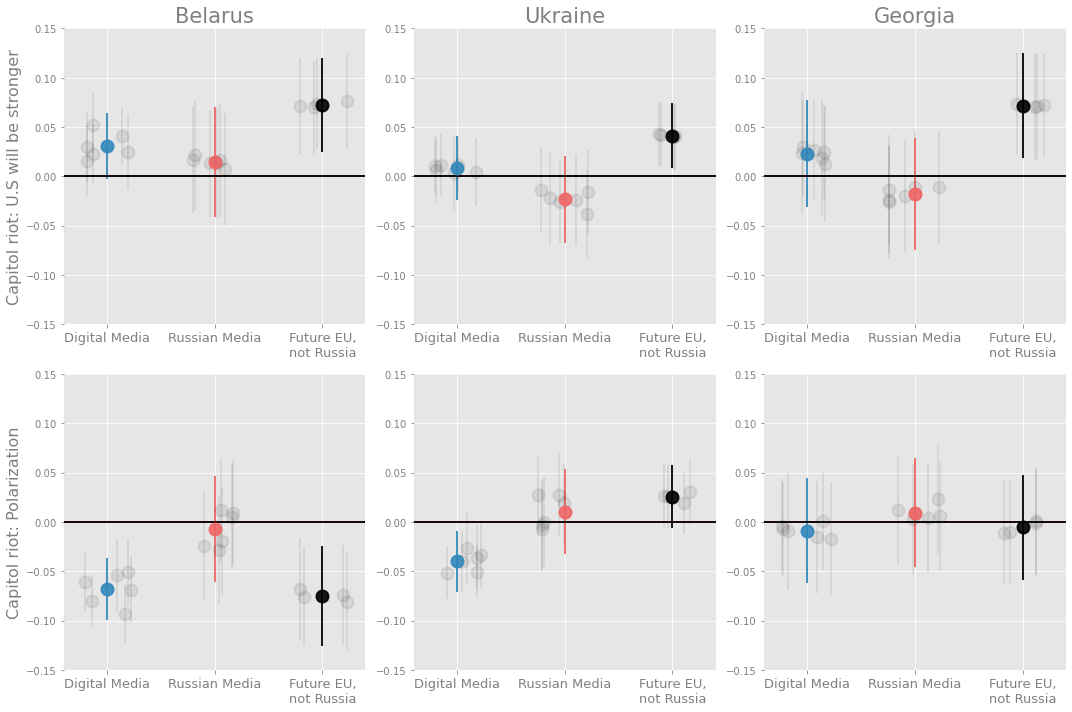

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cycler
from matplotlib.lines import Line2D
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

# legend_elements = [
#     #Line2D([0], [0], color='black', lw=4, label="Country Future: Russia vs. E.U"),
#     #Line2D([0], [0], color='tomato', lw=4, label="Country Future: Russia vs. Don't know"),
#     #Line2D([0], [0], color='cornflowerblue', lw=4, label="Country Future: Don't know vs. EU"),
#     Line2D([0], [0], marker='s', color='grey', label='Media Trust', markerfacecolor='k', markersize=10),
#     Line2D([0], [0], marker='^', color='grey', label='Media Source', markerfacecolor='k', markersize=10)
# ]
                   
                   
#                   Line2D([0], [0], marker='o', color='w', label='Scatter',
#                          markerfacecolor='g', markersize=15),
#                   Patch(facecolor='orange', edgecolor='r',
#                         label='Color Patch')]

#'black', 'country_future_russia_dontknow': 'tomato', 
#     'country_future_dontknow_eu': 'cornflowerblue'} )


f,ax = plt.subplots(2,3, figsize=(15,10))

for c_n, con_q in enumerate(['Belarus', 'Ukraine', 'Georgia']):
    
    ii_country = (df_cat['country'] == con_q)

    for q_n, cap_q in enumerate(capitol_ques):

        ii_capitol = (df_cat['capitol'] == cap_q)

        d = df_cat[ii_country & ii_capitol]

    #c_n = 0
    #q_n = 0
        print(q_n)

        for ii in range(d.shape[0]):
            #print(ii)
            d_i = d.iloc[ii]
            #print(d_i)

            x = d_i.x + np.random.uniform(-0.25,0.25)

            y = d_i.AME
            yerr=np.asarray([[y-d_i.lower, d_i.upper-y] ]).T
            mark = d_i.mark
            color = d_i.color

            ax[q_n, c_n].plot(np.asarray([0.6,3.4]), np.asarray([0,0]),'k', alpha=0.07)
            ax[q_n, c_n].errorbar(x, y, yerr=yerr, marker=mark, markerfacecolor=color,markeredgecolor=color, ecolor=color,
                        ms=12, mew=2,alpha=0.07)
            
        digital_m = d[d.factor.isin(["source_digital", "trust_digital"])].mean()
        russian_m = d[d.factor.isin(["source_russian", "trust_russian"])].mean()
        eu_rus_m = d[d.factor.isin(["country_future_ordinal"])].mean()
        
        for d_i, color in zip([digital_m, russian_m, eu_rus_m], ['#3388BB','#EE6666','black']):
            
            y = d_i.AME
            yerr=np.asarray([[y-d_i.lower, d_i.upper-y] ]).T
            x_m = d_i.x

            ax[q_n, c_n].plot(np.asarray([0.6,3.4]), np.asarray([0,0]),color=color, alpha=0.9)
            ax[q_n, c_n].errorbar(x_m, y, yerr=yerr, marker='o', markerfacecolor=color,markeredgecolor=color, ecolor=color,
                        ms=12, mew=2,alpha=0.9)      


        ax[q_n, c_n].set_xticks([1,2,3])
        ax[q_n, c_n].set_xticklabels(['Digital Media','Russian Media','Future EU,\nnot Russia'],rotation = 0, fontsize=13)
        ax[q_n, c_n].set_xlim([0.6,3.4])
        ax[q_n, c_n].set_ylim([-0.15, 0.15])
          
        
        ts = 16
        if c_n == 0:
            #capitol_weak_strong', 'capitol_weak_noeffect', 'capitol_strong_noeffect
            ax[0,c_n].set_ylabel("Capitol riot: U.S will be stronger", fontsize=ts, color='gray')
            ax[1,c_n].set_ylabel("Capitol riot: Polarization", fontsize=ts, color='gray')
            #ax[2,c_n].set_ylabel("Capitol riot: no effect vs strong", fontsize=ts, color='gray')

        ts = 21
        if q_n == 0:
            #capitol_weak_strong', 'capitol_weak_noeffect', 'capitol_strong_noeffect
            ax[q_n, 0].set_title("Belarus", fontsize=ts, color='gray')
            ax[q_n,1].set_title("Ukraine", fontsize=ts, color='gray')
            ax[q_n,2].set_title("Georgia", fontsize=ts, color='gray')     
                
# this is the position for results with all country fture preference questions included
#ax[2,0].legend(handles=legend_elements, bbox_to_anchor=(2.7, 3.8), ncol=2, fontsize=18)

# 
plt.tight_layout()
#ax[0,0].legend(handles=legend_elements, bbox_to_anchor=(2.3, 1.3), ncol=2, fontsize=18)

# plt.savefig('regression_marginal_effect_plots_only_russia_v_EU_country_future_ordinal.pdf',  bbox_inches='tight')
# plt.close()
plt.show()


0
1
0
1
0
1


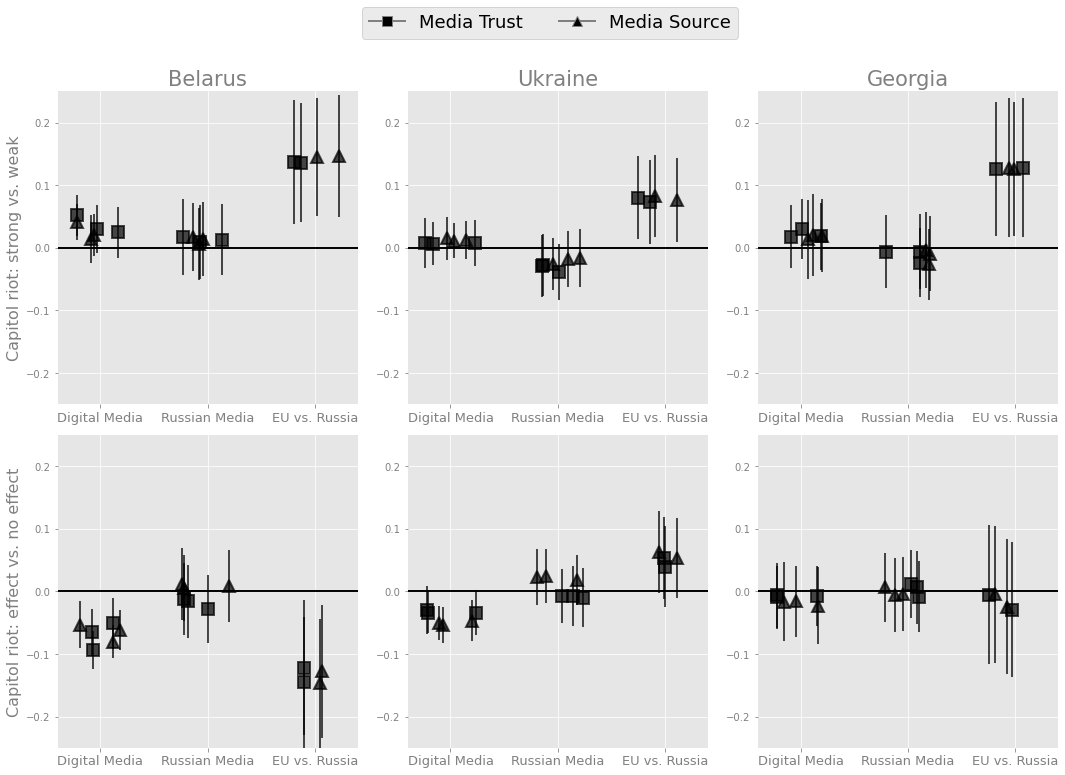

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cycler
from matplotlib.lines import Line2D
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

legend_elements = [
    #Line2D([0], [0], color='black', lw=4, label="Country Future: Russia vs. E.U"),
    #Line2D([0], [0], color='tomato', lw=4, label="Country Future: Russia vs. Don't know"),
    #Line2D([0], [0], color='cornflowerblue', lw=4, label="Country Future: Don't know vs. EU"),
    Line2D([0], [0], marker='s', color='grey', label='Media Trust', markerfacecolor='k', markersize=10),
    Line2D([0], [0], marker='^', color='grey', label='Media Source', markerfacecolor='k', markersize=10)
]
                   
                   
#                   Line2D([0], [0], marker='o', color='w', label='Scatter',
#                          markerfacecolor='g', markersize=15),
#                   Patch(facecolor='orange', edgecolor='r',
#                         label='Color Patch')]

#'black', 'country_future_russia_dontknow': 'tomato', 
#     'country_future_dontknow_eu': 'cornflowerblue'} )


f,ax = plt.subplots(2,3, figsize=(15,10))

for c_n, con_q in enumerate(['Belarus', 'Ukraine', 'Georgia']):
    
    ii_country = (df_cat['country'] == con_q)

    for q_n, cap_q in enumerate(capitol_ques):

        ii_capitol = (df_cat['capitol'] == cap_q)

        d = df_cat[ii_country & ii_capitol]

    #c_n = 0
    #q_n = 0
        print(q_n)

        for ii in range(d.shape[0]):
            #print(ii)
            #print(d.shape)
            d_i = d.iloc[ii]
            #print(d_i)

            x = d_i.x + np.random.uniform(-0.25,0.25)

            y = d_i.AME
            yerr=np.asarray([[y-d_i.lower, d_i.upper-y] ]).T
            mark = d_i.mark
            color = d_i.color

            ax[q_n, c_n].plot(np.asarray([0.6,3.4]), np.asarray([0,0]),'k', alpha=0.2)

            ax[q_n, c_n].errorbar(x, y, yerr=yerr, marker=mark, markerfacecolor=color,markeredgecolor=color, ecolor=color,
                        ms=12, mew=2,alpha=0.7)


            ax[q_n, c_n].set_xticks([1,2,3])
            ax[q_n, c_n].set_xticklabels(['Digital Media','Russian Media','EU vs. Russia'],rotation = 0, fontsize=13)
            ax[q_n, c_n].set_xlim([0.6,3.4])
            ax[q_n, c_n].set_ylim([-0.25, 0.25])
            
            ts = 16
            if c_n == 0:
                #capitol_weak_strong', 'capitol_weak_noeffect', 'capitol_strong_noeffect
                ax[0,c_n].set_ylabel("Capitol riot: strong vs. weak", fontsize=ts, color='gray')
                ax[1,c_n].set_ylabel("Capitol riot: effect vs. no effect", fontsize=ts, color='gray')
                #ax[2,c_n].set_ylabel("Capitol riot: no effect vs strong", fontsize=ts, color='gray')
             
            ts = 21
            if q_n == 0:
                #capitol_weak_strong', 'capitol_weak_noeffect', 'capitol_strong_noeffect
                ax[q_n, 0].set_title("Belarus", fontsize=ts, color='gray')
                ax[q_n,1].set_title("Ukraine", fontsize=ts, color='gray')
                ax[q_n,2].set_title("Georgia", fontsize=ts, color='gray')     
                
# this is the position for results with all country fture preference questions included
#ax[2,0].legend(handles=legend_elements, bbox_to_anchor=(2.7, 3.8), ncol=2, fontsize=18)

# 
plt.tight_layout()
ax[0,0].legend(handles=legend_elements, bbox_to_anchor=(2.3, 1.3), ncol=2, fontsize=18)

#plt.savefig('regression_marginal_effect_plots_only_russia_v_EU_alt.pdf',  bbox_inches='tight')
#plt.close()
plt.show()


0
1
0
1
0
1


/Users/damianruck/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


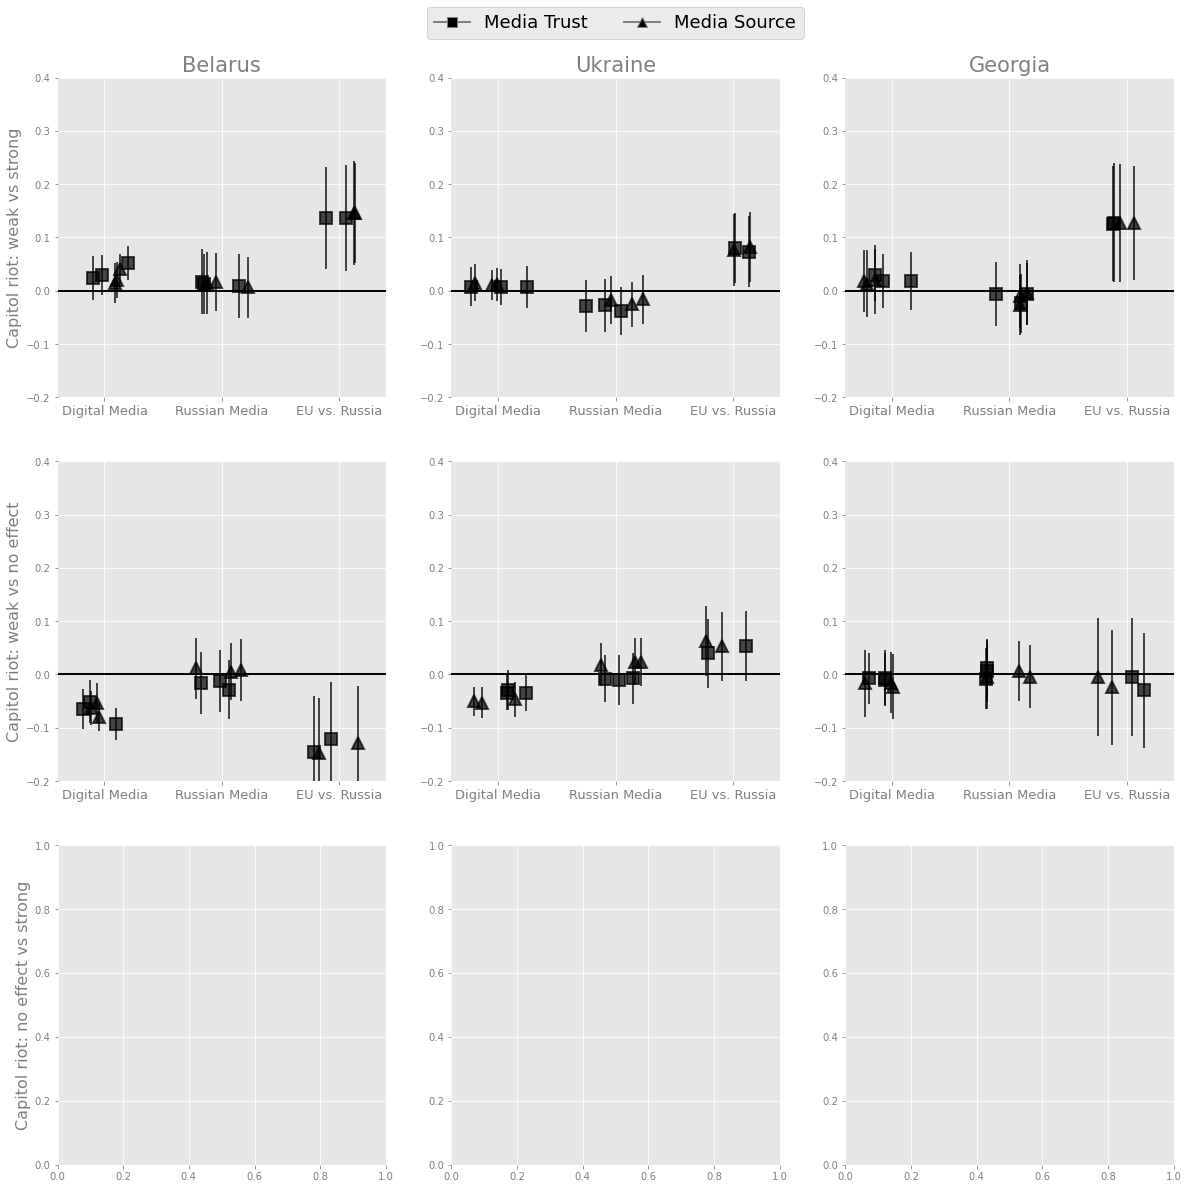

In [21]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cycler
from matplotlib.lines import Line2D
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

legend_elements = [
    #Line2D([0], [0], color='black', lw=4, label="Country Future: Russia vs. E.U"),
    #Line2D([0], [0], color='tomato', lw=4, label="Country Future: Russia vs. Don't know"),
    #Line2D([0], [0], color='cornflowerblue', lw=4, label="Country Future: Don't know vs. EU"),
    Line2D([0], [0], marker='s', color='grey', label='Media Trust', markerfacecolor='k', markersize=10),
    Line2D([0], [0], marker='^', color='grey', label='Media Source', markerfacecolor='k', markersize=10)
]
                   
                   
#                   Line2D([0], [0], marker='o', color='w', label='Scatter',
#                          markerfacecolor='g', markersize=15),
#                   Patch(facecolor='orange', edgecolor='r',
#                         label='Color Patch')]

#'black', 'country_future_russia_dontknow': 'tomato', 
#     'country_future_dontknow_eu': 'cornflowerblue'} )


f,ax = plt.subplots(3,3, figsize=(20,20))

for c_n, con_q in enumerate(['Belarus', 'Ukraine', 'Georgia']):
    
    ii_country = (df_cat['country'] == con_q)

    for q_n, cap_q in enumerate(capitol_ques):

        ii_capitol = (df_cat['capitol'] == cap_q)

        d = df_cat[ii_country & ii_capitol]

    #c_n = 0
    #q_n = 0
        print(q_n)

        for ii in range(d.shape[0]):
            #print(ii)
            #print(d.shape)
            d_i = d.iloc[ii]
            #print(d_i)

            x = d_i.x + np.random.uniform(-0.25,0.25)

            y = d_i.AME
            yerr=np.asarray([[y-d_i.lower, d_i.upper-y] ]).T
            mark = d_i.mark
            color = d_i.color

            ax[q_n, c_n].plot(np.asarray([0.6,3.4]), np.asarray([0,0]),'k', alpha=0.2)

            ax[q_n, c_n].errorbar(x, y, yerr=yerr, marker=mark, markerfacecolor=color,markeredgecolor=color, ecolor=color,
                        ms=12, mew=2,alpha=0.7)


            ax[q_n, c_n].set_xticks([1,2,3])
            ax[q_n, c_n].set_xticklabels(['Digital Media','Russian Media','EU vs. Russia'],rotation = 0, fontsize=13)
            ax[q_n, c_n].set_xlim([0.6,3.4])
            ax[q_n, c_n].set_ylim([-0.2, 0.4])
            
            ts = 16
            if c_n == 0:
                #capitol_weak_strong', 'capitol_weak_noeffect', 'capitol_strong_noeffect
                ax[0,c_n].set_ylabel("Capitol riot: weak vs strong", fontsize=ts, color='gray')
                ax[1,c_n].set_ylabel("Capitol riot: weak vs no effect", fontsize=ts, color='gray')
                ax[2,c_n].set_ylabel("Capitol riot: no effect vs strong", fontsize=ts, color='gray')
             
            ts = 21
            if q_n == 0:
                #capitol_weak_strong', 'capitol_weak_noeffect', 'capitol_strong_noeffect
                ax[q_n, 0].set_title("Belarus", fontsize=ts, color='gray')
                ax[q_n,1].set_title("Ukraine", fontsize=ts, color='gray')
                ax[q_n,2].set_title("Georgia", fontsize=ts, color='gray')     
                
# this is the position for results with all country fture preference questions included
#ax[2,0].legend(handles=legend_elements, bbox_to_anchor=(2.7, 3.8), ncol=2, fontsize=18)

# 
ax[2,0].legend(handles=legend_elements, bbox_to_anchor=(2.3, 3.65), ncol=2, fontsize=18)
plt.tight_layout()
#plt.savefig('regression_marginal_effect_plots_only_russia_v_EU.pdf',  bbox_inches='tight')
#plt.close()
plt.show()
